## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [101]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [102]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [103]:
# Write your code here
happiness = pd.read_csv(HAPPINESS_DATASET, sep=',')
happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [104]:
countries = pd.read_csv(COUNTRIES_DATASET, sep=',')
countries.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [105]:
# Write your code here
country_features = pd.merge(happiness, countries, left_on=happiness['country'].str.lower(), right_on='country_name')
country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,"36,0"
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania,28748,3581655,"86,5"
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria,2381740,32930091,"70,0"
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina,2766890,39921833,"97,1"
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia,29800,2976372,"98,6"


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [106]:
# Write your code here
country_features.nlargest(10, 'happiness_score')

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
38,Finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,finland,338145,5231372,"100,0"
31,Denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,denmark,43094,5450661,"100,0"
115,Switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe,switzerland,41290,7523934,"99,0"
50,Iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe,iceland,103000,299388,"99,9"
92,Norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,norway,323802,4610820,"100,0"
87,Netherlands,7.4489,0.939139,72.300919,0.908548,0.207612,0.364717,Western Europe,netherlands,41526,16491461,"99,0"
114,Sweden,7.3535,0.926311,72.600769,0.939144,0.111615,0.250880,Western Europe,sweden,449964,9016596,"99,0"
88,New Zealand,7.2996,0.949119,73.202629,0.936217,0.191598,0.221139,North America and ANZ,new zealand,268680,4076140,"99,0"
6,Austria,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe,austria,83870,8192880,"98,0"
72,Luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe,luxembourg,2586,474413,"100,0"


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of countries for each world region.
Sort the result to show the happiness ranking.

In [107]:
# Write your code here
cf_groupby_wr = country_features.groupby(['world_region'])
world_region_happiness = pd.DataFrame([cf_groupby_wr['happiness_score'].mean(), cf_groupby_wr.country.count()]).T
world_region_happiness = world_region_happiness.sort_values('happiness_score', ascending=False)
world_region_happiness

,happiness_score,country
world_region,,
North America and ANZ,7.173525,4.0
Western Europe,6.967405,20.0
Latin America and Caribbean,5.971280,20.0
Central and Eastern Europe,5.891393,14.0
Southeast Asia,5.517788,8.0
East Asia,5.483633,3.0
Commonwealth of Independent States,5.358342,12.0
Middle East and North Africa,5.269306,16.0
Sub-Saharan Africa,4.393856,32.0


The first region has only a few countries! What are them and what is their score?

In [108]:
# Write your code here
country_features[country_features['world_region'] == world_region_happiness.index[0]][['country', 'happiness_score']]

,country,happiness_score
5,Australia,7.2228
21,Canada,7.2321
88,New Zealand,7.2996
127,United States,6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [109]:
# Write your code here
country_features[country_features.literacy == '100,0'].apply(lambda row: f'{row['world_region']}-{row['country']}({row['happiness_score']})', axis=1)#.apply(lambda row: f'{row}')#-{row} ({row})')

5     North America and ANZ-Australia(7.222799778)
31             Western Europe-Denmark(7.645599842)
38             Western Europe-Finland(7.808700085)
72          Western Europe-Luxembourg(7.237500191)
92        Western Europe-Norway(7.487999916000001)
dtype: object

What is the global average?

In [110]:
# Write your code here
country_features.literacy.replace(',', '.', regex=True).astype(float).mean()

np.float64(81.85112781954888)

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [111]:
# Write your code here
countries_literacy_lower_50 = country_features[country_features.literacy.replace(',', '.', regex=True).astype(float) < 50.0]
prop_country_literacy_lower_50 = countries_literacy_lower_50.country.count()/country_features.country.count() * 100

print(f'{prop_country_literacy_lower_50:.2f}%')

11.85%


Print the raw number and the percentage of world population that is illiterate.

In [112]:
# Write your code here
country_features_literacy = country_features.literacy.replace(',', '.', regex=True).astype(float)
country_features_pop = country_features.population
illiterate_pop = (country_features_literacy * country_features_pop).round().sum()
illiterate_percentage = country_features_pop.sum()/illiterate_pop * 100

print(f'world illiterate population: {illiterate_pop}, world illiterate percentage: {illiterate_percentage}%')

world illiterate population: 488861211093.0, world illiterate percentage: 1.2571001669901147%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [119]:
# Write your code here
country_features2 = country_features.copy()
country_features2['population_density'] = country_features2.population/country_features2.area
country_features2.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy,population_density
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,"36,0",47.964474
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania,28748,3581655,"86,5",124.587971
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria,2381740,32930091,"70,0",13.826065
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina,2766890,39921833,"97,1",14.428413
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia,29800,2976372,"98,6",99.878255


What is the happiness score of the 3 countries with the lowest population density?

In [122]:
# Write your code here
country_features2.nsmallest(3, 'population_density')[['country', 'happiness_score']]

,country,happiness_score
83,Mongolia,5.4562
5,Australia,7.2228
14,Botswana,3.4789


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

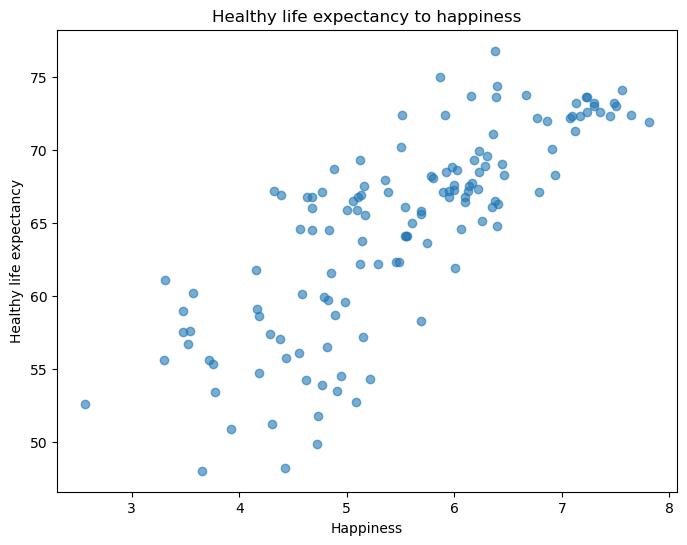

In [124]:
# Write your code here
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(country_features.happiness_score, country_features.healthy_life_expectancy, alpha=0.6)
plt.title('Healthy life expectancy to happiness')
plt.xlabel('Happiness')
plt.ylabel('Healthy life expectancy')
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.